<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workbook, we will use decision tree and support vector machines on a credit card prediction dataset to assess if a transaction is fradulent.

The last column in the dataset represents 0 for valid and 1 for fraudulent transactions

In [2]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [6]:
# https://docs.google.com/spreadsheets/d/1jqi-mM_7FGf2zP23mI3z0plCfPHO65tX5_zMGwA9UmU/edit?usp=sharing
sheet_id = "1jqi-mM_7FGf2zP23mI3z0plCfPHO65tX5_zMGwA9UmU"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,fraud
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The variables have been anonymized for confidentiality reasons and these values are the result of a PCA transformation so that they are all numerical

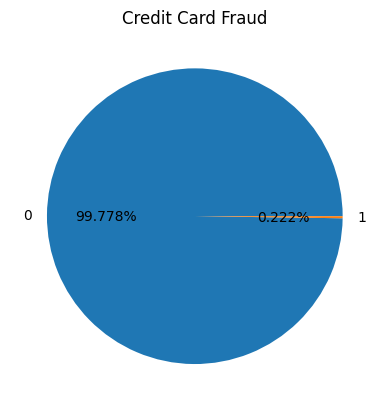

In [7]:
# lets take a look at the data
labels = df.fraud.unique()

sizes = df.fraud.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Credit Card Fraud')
plt.show()

the dataset is highly unbalanced and we will need to rebalance for the minority class or take into account the class weights at training and fit time

<Axes: >

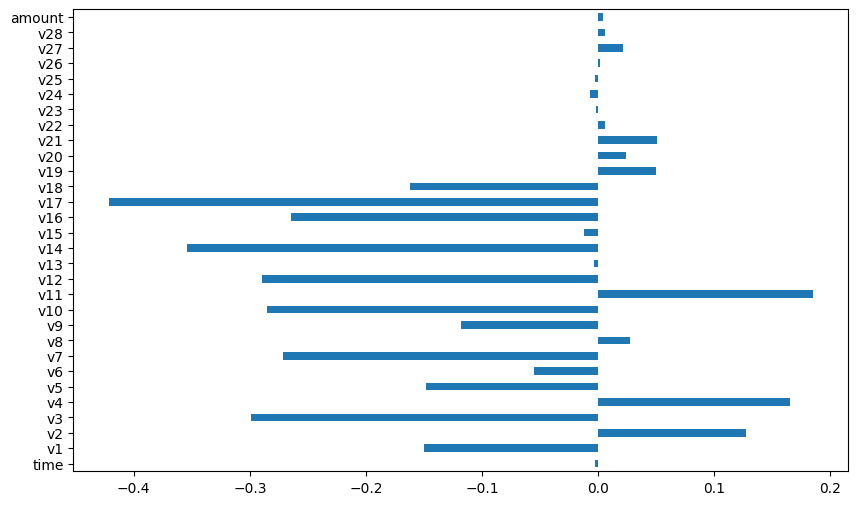

In [8]:
# what features affect the model in what way

correlation_values = df.corr()['fraud'].drop('fraud')
correlation_values.plot(kind='barh', figsize=(10,6))

In [9]:
# dataset preprocessing - apply standard scaling to input features and normalize them using l1 norm for the training models to converge quickly

df.iloc[:30] = StandardScaler().fit_transform(df.iloc[:30])

data_matrix = df.values

X = data_matrix[:, 1:30]

y = data_matrix[:, 30]

X = normalize(X, norm='l1')

In [10]:
# split the data in to training and testing groups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# build a decision tree classifier

w_train = compute_sample_weight('balanced', y_train)


In [12]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
# build a support vector machine model

svm = LinearSVC(class_weight='balanced', random_state=42, loss='hinge', fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=42)

In [14]:
# evaluate the decision tree model

y_pred_dt = dt.predict(X_test)

print('Decision Tree AUC: {}'.format(roc_auc_score(y_test, y_pred_dt)))

Decision Tree AUC: 0.9265046947411213


In [15]:
# evaluate the support vector machine model

y_pred_svm = svm.predict(X_test)

print('SVM AUC: {}'.format(roc_auc_score(y_test, y_pred_svm)))

SVM AUC: 0.9296490299603151


In [18]:
# what are the top features in the dataset

correlation_values = abs(df.corr()['fraud']).drop('fraud')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

,fraud
v17,0.421685
v14,0.354485
v3,0.299338
v12,0.289645
v10,0.284837
v7,0.271263
